In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.chebyshev import chebfit, cheb2poly
import sys
# sys.path.insert(0, '../seal_wrapper/')
# from seal_wrapper import EA

In [2]:
x = np.linspace(-3.9, 4.0, 80)
x

array([-3.9000000e+00, -3.8000000e+00, -3.7000000e+00, -3.6000000e+00,
       -3.5000000e+00, -3.4000000e+00, -3.3000000e+00, -3.2000000e+00,
       -3.1000000e+00, -3.0000000e+00, -2.9000000e+00, -2.8000000e+00,
       -2.7000000e+00, -2.6000000e+00, -2.5000000e+00, -2.4000000e+00,
       -2.3000000e+00, -2.2000000e+00, -2.1000000e+00, -2.0000000e+00,
       -1.9000000e+00, -1.8000000e+00, -1.7000000e+00, -1.6000000e+00,
       -1.5000000e+00, -1.4000000e+00, -1.3000000e+00, -1.2000000e+00,
       -1.1000000e+00, -1.0000000e+00, -9.0000000e-01, -8.0000000e-01,
       -7.0000000e-01, -6.0000000e-01, -5.0000000e-01, -4.0000000e-01,
       -3.0000000e-01, -2.0000000e-01, -1.0000000e-01,  4.4408921e-16,
        1.0000000e-01,  2.0000000e-01,  3.0000000e-01,  4.0000000e-01,
        5.0000000e-01,  6.0000000e-01,  7.0000000e-01,  8.0000000e-01,
        9.0000000e-01,  1.0000000e+00,  1.1000000e+00,  1.2000000e+00,
        1.3000000e+00,  1.4000000e+00,  1.5000000e+00,  1.6000000e+00,
      

In [3]:
def relu(z):
    return np.maximum(0, z)

In [4]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [5]:
def tanh(z):
    return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))

In [6]:
y = relu(x)

In [7]:
coeffs_cheb_4 = chebfit(x, y, deg=4)
coeffs_cheb_3 = chebfit(x, y, deg=3)

In [8]:
coeffs_4 = cheb2poly(coeffs_cheb_4)
coeffs_3 = cheb2poly(coeffs_cheb_3)
coeffs_3

array([ 0.37441365,  0.50586243,  0.11733419, -0.00085583])

In [9]:
data_4 = x[:, None] ** np.arange(coeffs_4.shape[0])
data_3 = x[:, None] ** np.arange(coeffs_3.shape[0])

In [10]:
relu_approx_4 = data_4.dot(coeffs_4[:, None])
relu_approx_3 = data_3.dot(coeffs_3[:, None])
#relu_approx = data.dot(np.array([0.308, 0.465, 0.149, 0.00827, -0.000987]).reshape(-1, 1))

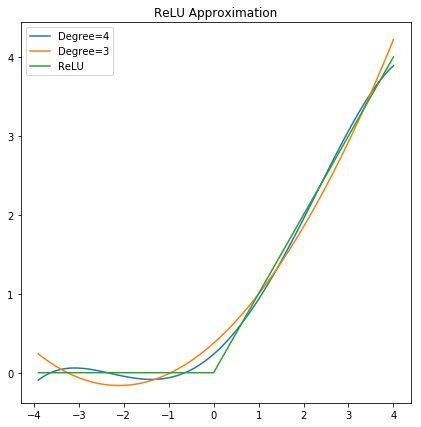

In [11]:
fig = plt.figure(figsize=(7, 7))
plt.plot(x, relu_approx_4)
plt.plot(x, relu_approx_3)
plt.plot(x, y)
plt.legend(['Degree=4', 'Degree=3', 'ReLU'])
plt.title('ReLU Approximation')
#plt.savefig('relu-approx.pdf')
plt.show()
